# Lab 3
## Imports

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, f1_score

from sklearn.dummy import DummyClassifier

## Data Loading and Pre-processing
- Use LabelEncoder to convert the label into numbers.
- Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
- Column "duration" must be deleted
- Check if there are any missing values in the dataset. If there are, drop the rows.
- Plot histogram of the label and calculate the imbalance in the dataset.

In [2]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Use LabelEncoder to convert the label into numbers.**

In [4]:
le = LabelEncoder()
y_df = le.fit_transform(df['y'])
y_df
df = df.drop('y', axis=1)

**Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)**

In [5]:
df_dummies = pd.get_dummies(df)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

**Column "duration" must be deleted**

In [6]:
df_dummies = df_dummies.drop('duration', axis=1)

**Check if there are any missing values in the dataset. If there are, drop the rows.**

In [7]:
print("Number of rows before dropping NaNs: %d" % len(df_dummies))
df = df_dummies.dropna()
print("Number of rows after dropping NaNs: %d" % len(df_dummies))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


**Plot histogram of the label and calculate the imbalance in the dataset.**

0.11265417111780131


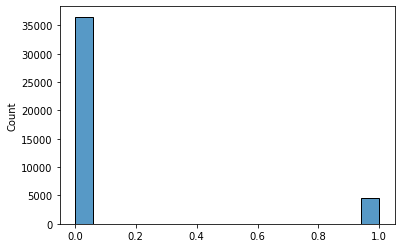

In [8]:
sns.histplot(y_df, kde=False)
_, counts = np.unique(y_df, return_counts=True)
inbalance = counts[1] / (counts[0] + counts[1])
print(inbalance)

## Modeling the Data

In [9]:
x = df_dummies.values
y = y_df

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
_, counts = np.unique(y_train, return_counts=True)
inbalance = counts[1] / (counts[0] + counts[1])
print(inbalance)

0.11198786039453718


In [11]:
_, counts = np.unique(y_test, return_counts=True)
inbalance = counts[1] / (counts[0] + counts[1])
print(inbalance)

0.1153192522456907


### Random Forest Tree

In [12]:
forest = RandomForestClassifier(max_depth=3)
score = cross_val_score(forest, x_train, y_train, cv=10, scoring = make_scorer(f1_score))

In [29]:
print(max(score))

0.28888888888888886


In [14]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
print("Dummy ACC: %.2f" % acc(y_train, dummy_clf.predict(x_train)))

Dummy ACC: 0.80


In [15]:
forest.fit(x_train, y_train)
print("Forest ACC: %.2f" % acc(y_train, forest.predict(x_train)))

Forest ACC: 0.90


### GridSearchCV

In [26]:
forest = RandomForestClassifier(max_depth=3)
parameters = {'n_estimators': [100],'max_depth': [3]}
clf = GridSearchCV(forest, parameters)
clf.fit(x_train, y_train)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [27]:
clf.score(x_test, y_test)

0.8948773974265598